<a href="https://colab.research.google.com/github/navseducation/Gen-AI-Purdue-Course/blob/main/1_MNIST_DCGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### DCGAN  on MNIST

DCGAN is a Generative Adversarial Network (GAN) using CNN.

1. The discriminator learns to discriminate real from fake images.
2. The generator tries to fool the discriminator by generating fake images.
3. The generator + discriminator form an adversarial network.
4. DCGAN trains the discriminator and adversarial networks alternately.

During training, not only the discriminator learns to distinguish real from
fake images, it also coaches the generator part of the Adversarial network on how
to improve its ability to generate fake images.

In [1]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt
import os

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
--- Starting GAN Training ---
Time for epoch 1 is 65.11 sec
Generator Loss: 0.7939, Discriminator Loss: 1.3938


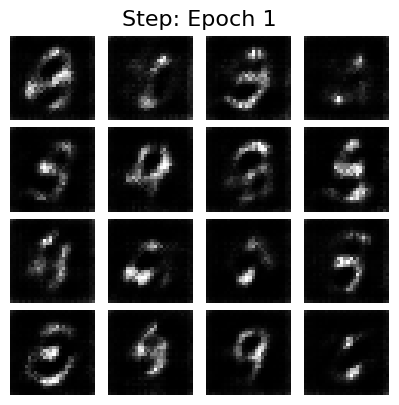

Time for epoch 2 is 60.03 sec
Generator Loss: 0.8178, Discriminator Loss: 1.4224


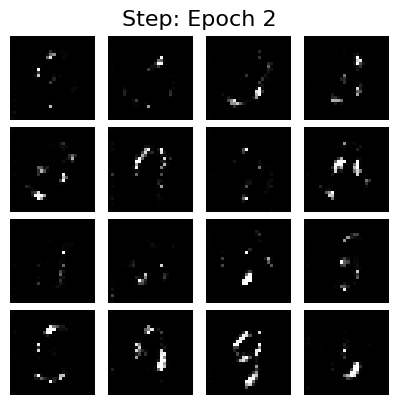

Time for epoch 3 is 59.86 sec
Generator Loss: 0.7671, Discriminator Loss: 1.3785


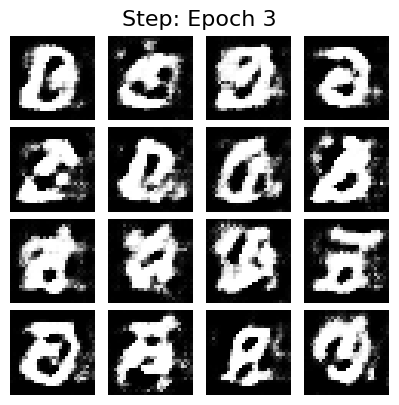

Time for epoch 4 is 60.57 sec
Generator Loss: 0.8277, Discriminator Loss: 1.3824


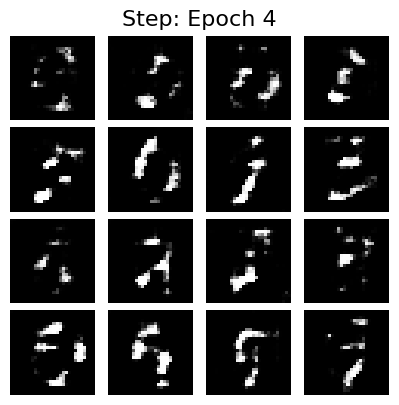

Time for epoch 5 is 61.71 sec
Generator Loss: 0.8261, Discriminator Loss: 1.3386


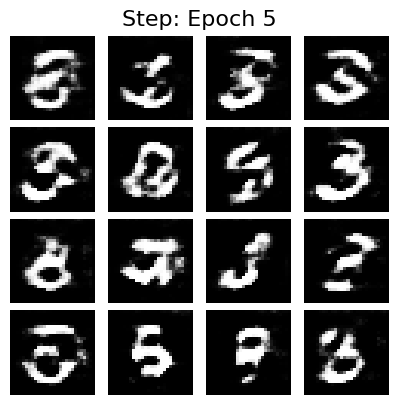

Time for epoch 6 is 60.42 sec
Generator Loss: 0.8982, Discriminator Loss: 1.3013


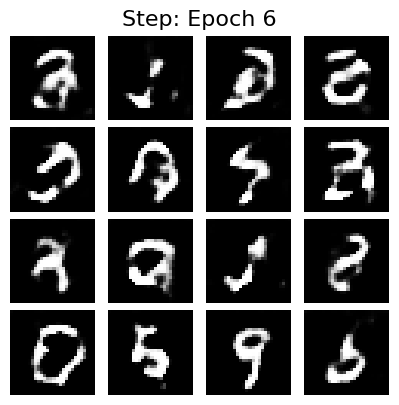

Time for epoch 7 is 60.46 sec
Generator Loss: 0.8767, Discriminator Loss: 1.2759


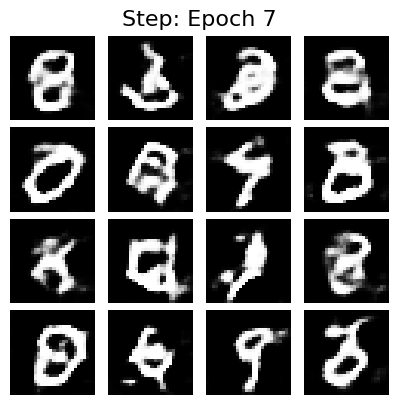

Time for epoch 8 is 59.80 sec
Generator Loss: 0.8800, Discriminator Loss: 1.3538


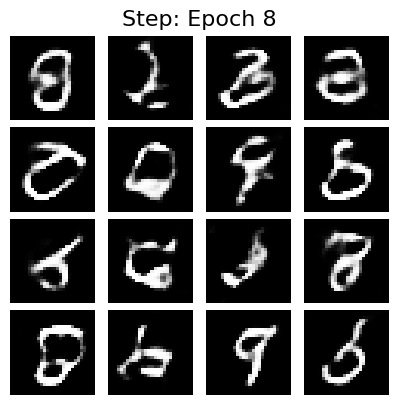

Time for epoch 9 is 60.16 sec
Generator Loss: 0.8869, Discriminator Loss: 1.3488


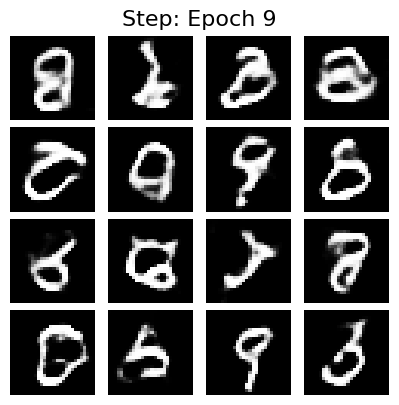

Time for epoch 10 is 60.41 sec
Generator Loss: 0.8102, Discriminator Loss: 1.3353


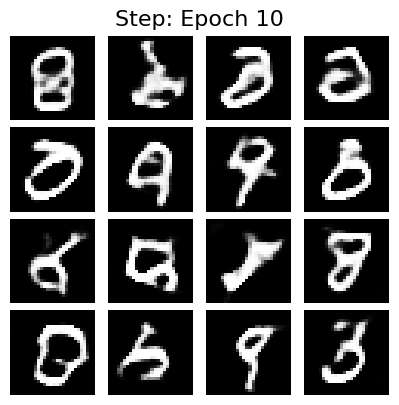

Time for epoch 11 is 59.79 sec
Generator Loss: 0.8362, Discriminator Loss: 1.2884


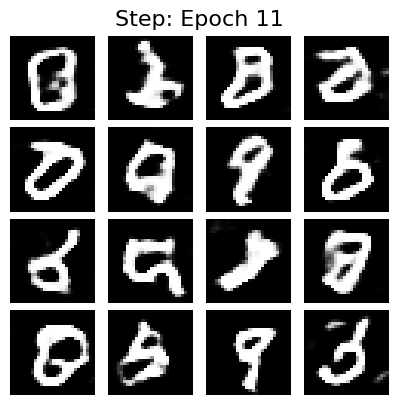

Time for epoch 12 is 59.88 sec
Generator Loss: 0.8321, Discriminator Loss: 1.3487


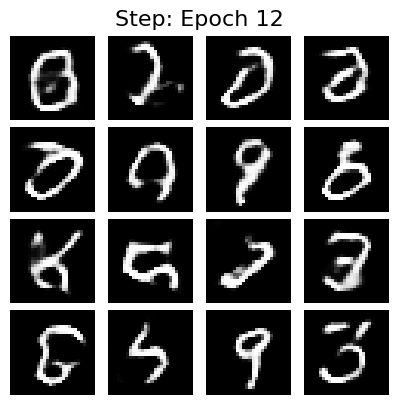

Time for epoch 13 is 60.39 sec
Generator Loss: 0.8685, Discriminator Loss: 1.3746


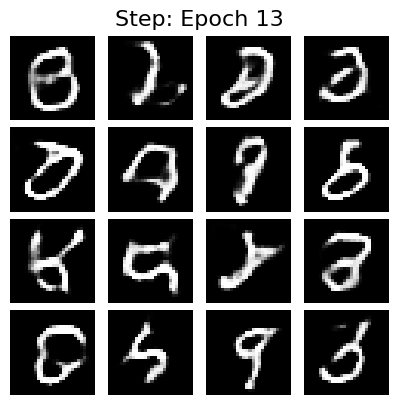

Time for epoch 14 is 60.12 sec
Generator Loss: 0.7699, Discriminator Loss: 1.3441


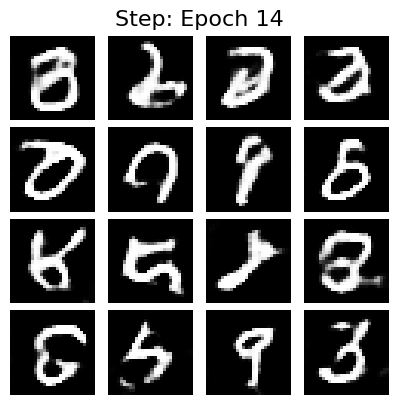

Time for epoch 15 is 60.20 sec
Generator Loss: 0.8248, Discriminator Loss: 1.3635


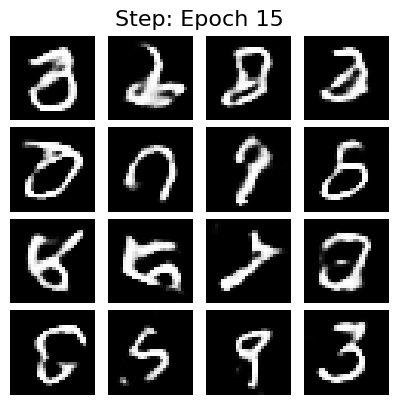

Time for epoch 16 is 60.74 sec
Generator Loss: 0.8767, Discriminator Loss: 1.3469


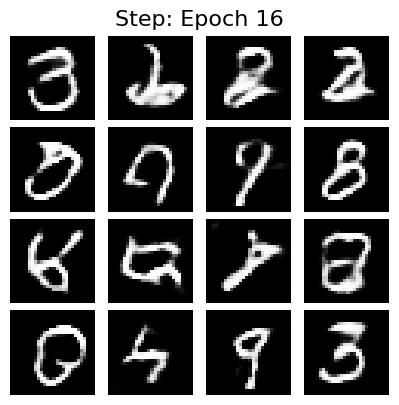

Time for epoch 17 is 60.12 sec
Generator Loss: 0.8582, Discriminator Loss: 1.4142


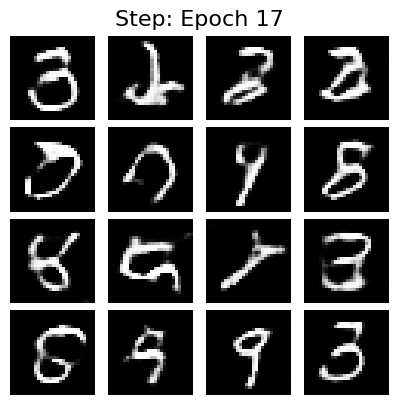

Time for epoch 18 is 60.11 sec
Generator Loss: 0.9902, Discriminator Loss: 1.3513


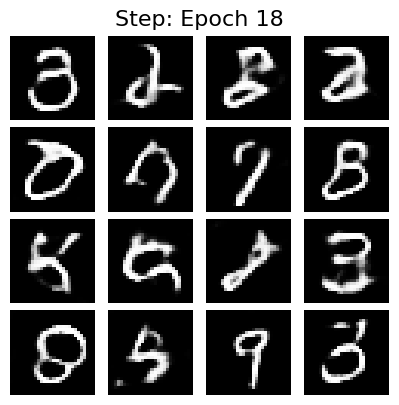

Time for epoch 19 is 60.46 sec
Generator Loss: 0.8650, Discriminator Loss: 1.3319


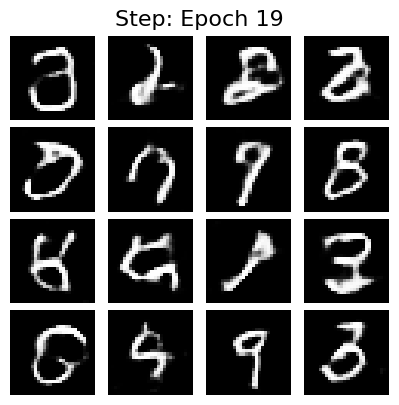

Time for epoch 20 is 59.92 sec
Generator Loss: 0.8251, Discriminator Loss: 1.3595


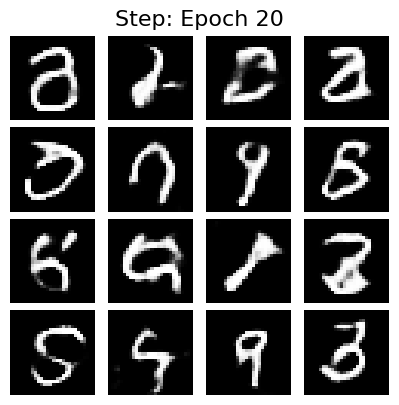

Time for epoch 21 is 59.87 sec
Generator Loss: 0.8941, Discriminator Loss: 1.3573


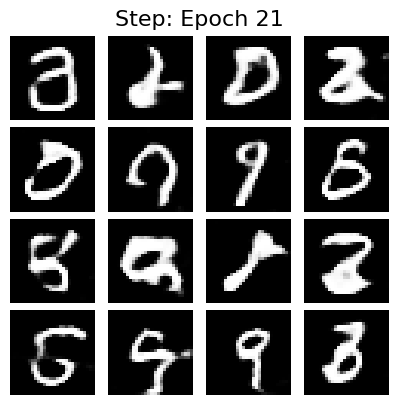

Time for epoch 22 is 60.44 sec
Generator Loss: 0.8561, Discriminator Loss: 1.2522


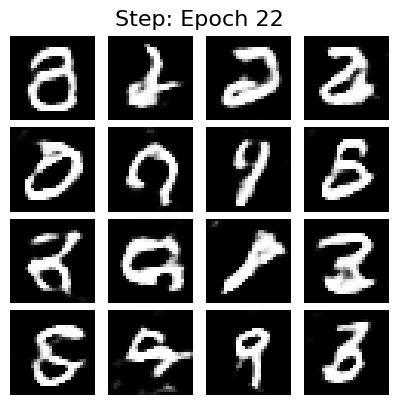

Time for epoch 23 is 60.06 sec
Generator Loss: 0.8057, Discriminator Loss: 1.3530


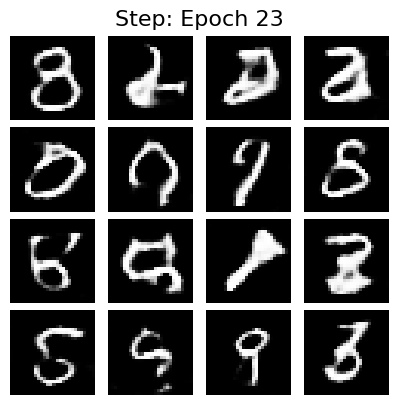

Time for epoch 24 is 60.00 sec
Generator Loss: 0.8499, Discriminator Loss: 1.3521


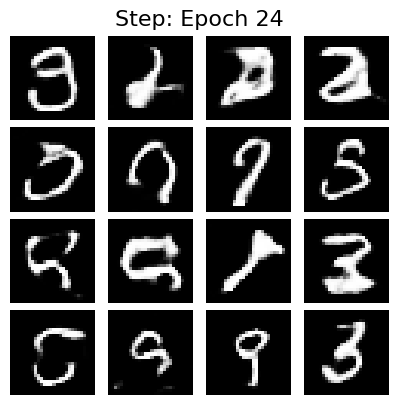

Time for epoch 25 is 60.28 sec
Generator Loss: 0.9751, Discriminator Loss: 1.3680


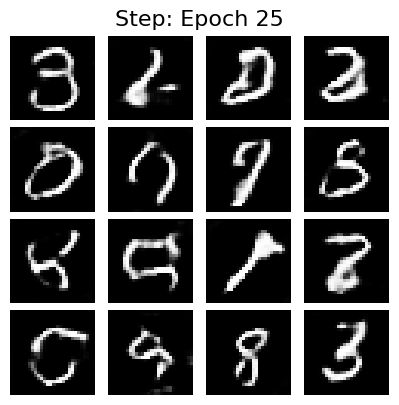

Time for epoch 26 is 59.92 sec
Generator Loss: 0.8711, Discriminator Loss: 1.3248


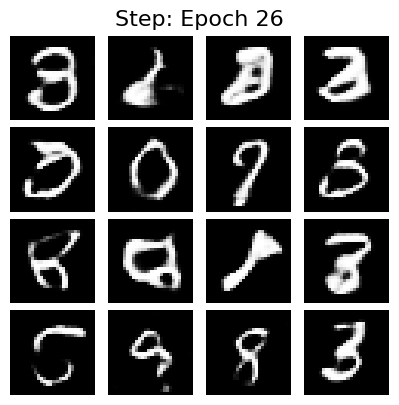

Time for epoch 27 is 59.89 sec
Generator Loss: 0.8719, Discriminator Loss: 1.3380


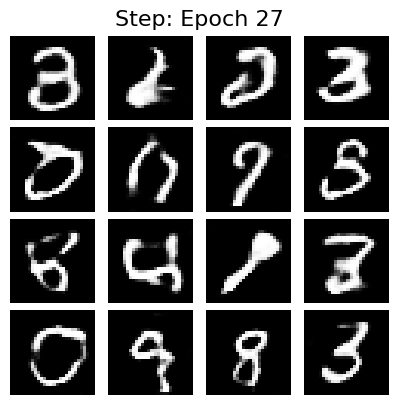

Time for epoch 28 is 60.56 sec
Generator Loss: 0.8337, Discriminator Loss: 1.3806


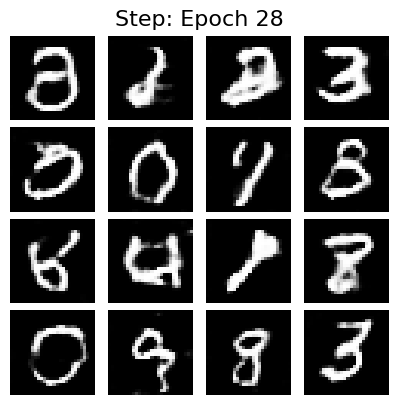

Time for epoch 29 is 60.00 sec
Generator Loss: 0.8244, Discriminator Loss: 1.3704


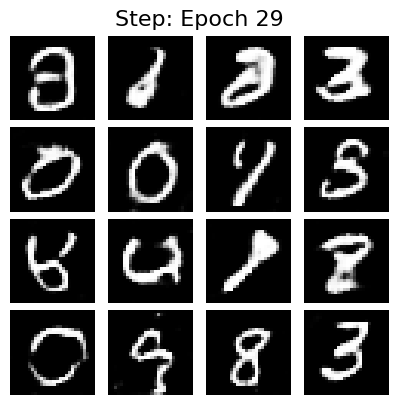

Time for epoch 30 is 59.86 sec
Generator Loss: 0.8576, Discriminator Loss: 1.2982


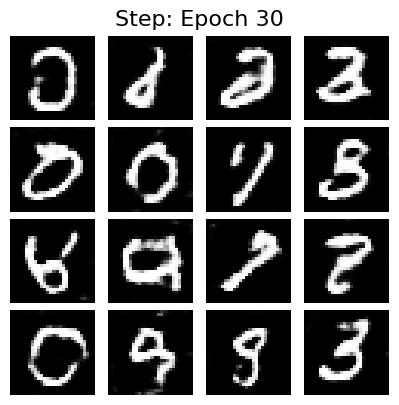

Time for epoch 31 is 60.60 sec
Generator Loss: 0.8386, Discriminator Loss: 1.3698


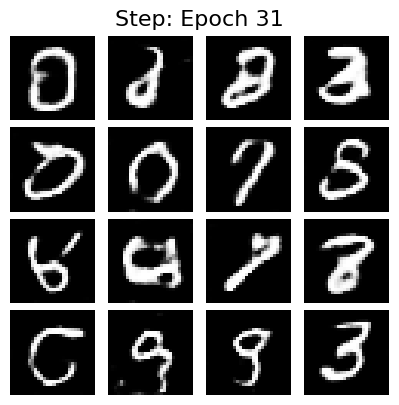

Time for epoch 32 is 59.84 sec
Generator Loss: 0.8233, Discriminator Loss: 1.3851


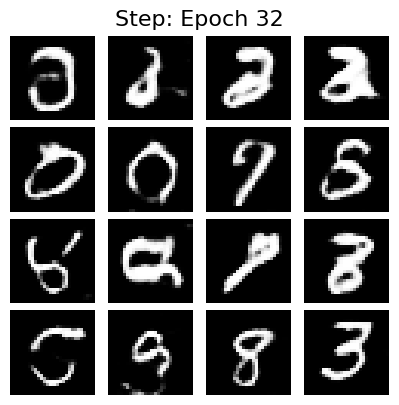

Time for epoch 33 is 59.97 sec
Generator Loss: 0.8304, Discriminator Loss: 1.3203


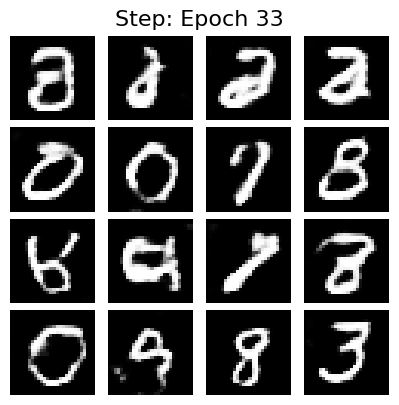

Time for epoch 34 is 60.35 sec
Generator Loss: 0.7912, Discriminator Loss: 1.3543


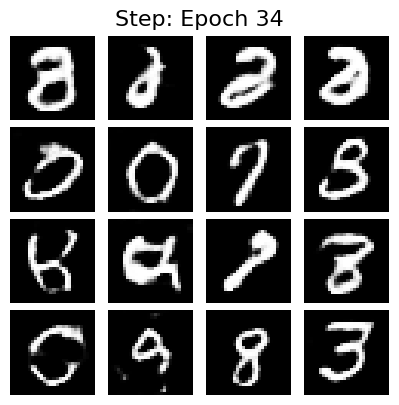

Time for epoch 35 is 59.73 sec
Generator Loss: 0.8778, Discriminator Loss: 1.4831


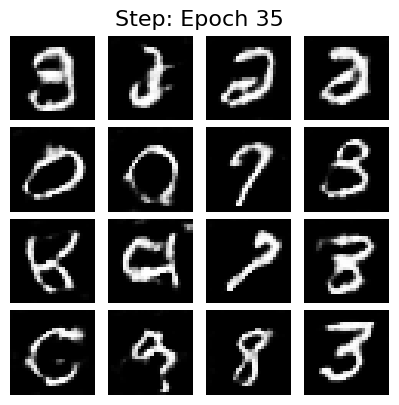

Time for epoch 36 is 59.99 sec
Generator Loss: 0.8156, Discriminator Loss: 1.3529


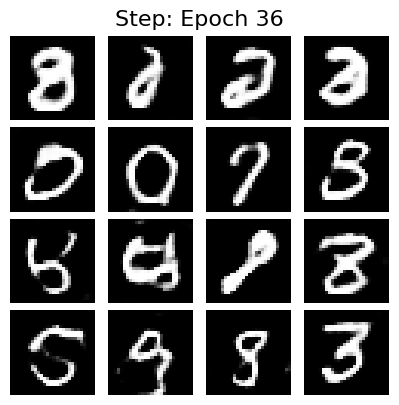

Time for epoch 37 is 60.60 sec
Generator Loss: 0.8343, Discriminator Loss: 1.3478


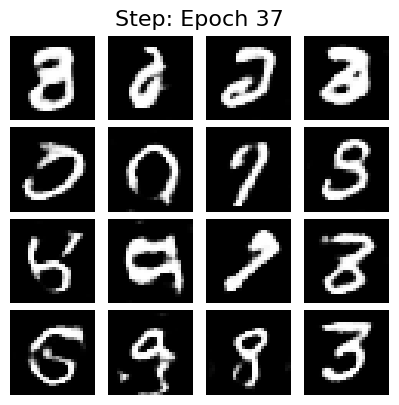

Time for epoch 38 is 60.01 sec
Generator Loss: 0.8084, Discriminator Loss: 1.3276


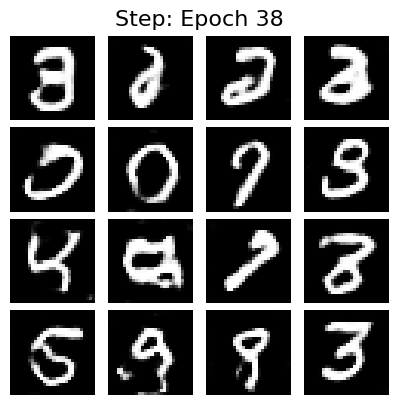

Time for epoch 39 is 59.87 sec
Generator Loss: 0.8348, Discriminator Loss: 1.3506


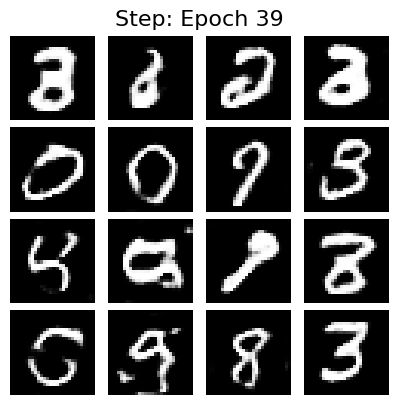

Time for epoch 40 is 60.32 sec
Generator Loss: 0.8209, Discriminator Loss: 1.3682


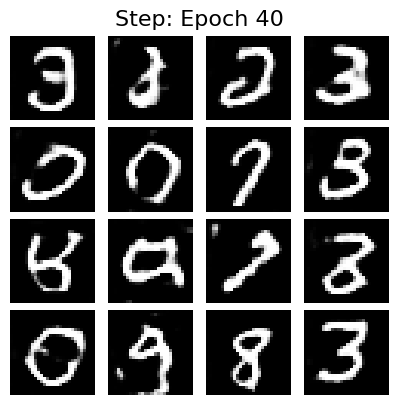

Time for epoch 41 is 59.63 sec
Generator Loss: 0.8002, Discriminator Loss: 1.3615


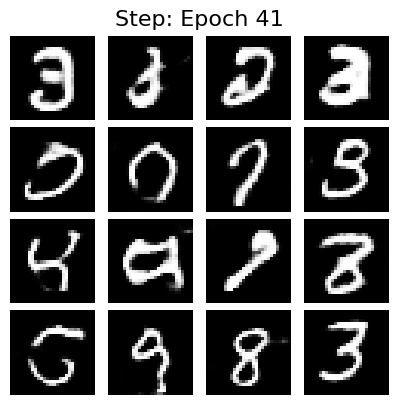

Time for epoch 42 is 59.62 sec
Generator Loss: 0.8534, Discriminator Loss: 1.3647


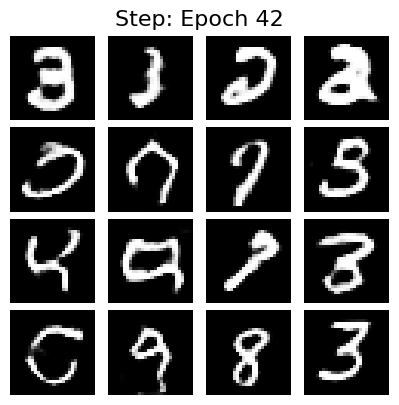

Time for epoch 43 is 60.20 sec
Generator Loss: 0.7904, Discriminator Loss: 1.3839


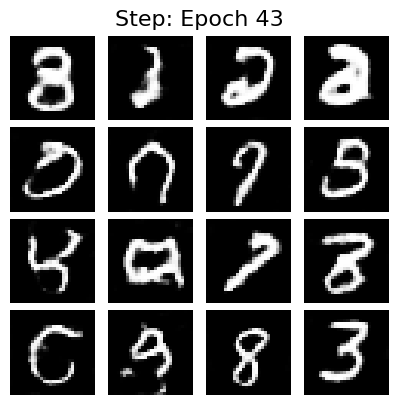

Time for epoch 44 is 59.49 sec
Generator Loss: 0.8489, Discriminator Loss: 1.3632


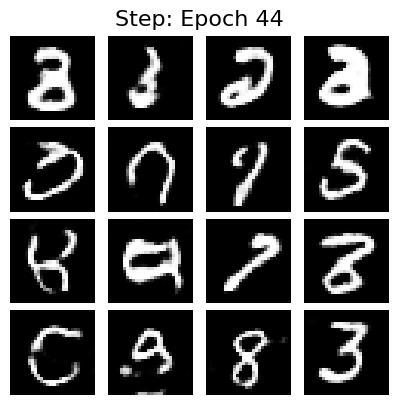

Time for epoch 45 is 59.70 sec
Generator Loss: 0.8236, Discriminator Loss: 1.4476


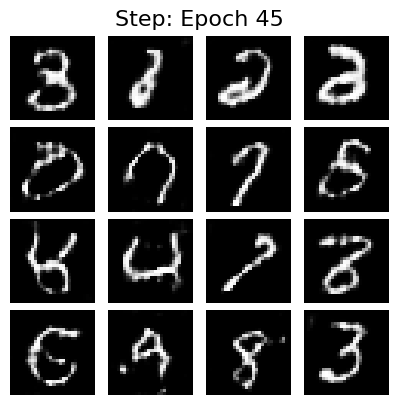

Time for epoch 46 is 61.14 sec
Generator Loss: 0.8663, Discriminator Loss: 1.3599


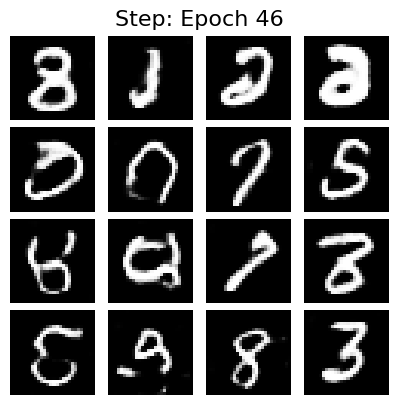

Time for epoch 47 is 59.90 sec
Generator Loss: 0.8610, Discriminator Loss: 1.3530


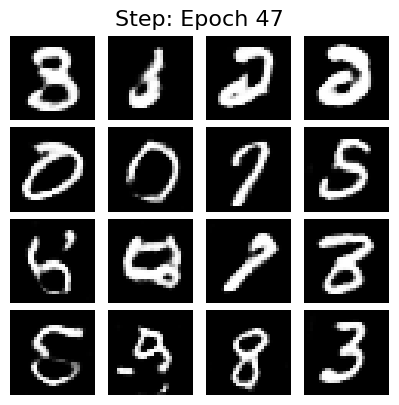

Time for epoch 48 is 59.88 sec
Generator Loss: 0.8743, Discriminator Loss: 1.3462


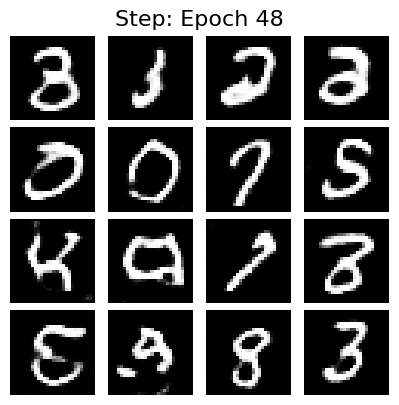

Time for epoch 49 is 60.43 sec
Generator Loss: 0.7885, Discriminator Loss: 1.3233


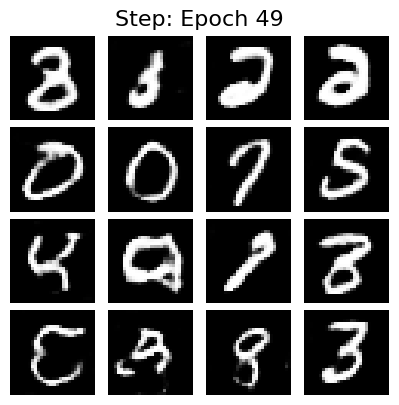

Time for epoch 50 is 60.46 sec
Generator Loss: 0.8644, Discriminator Loss: 1.3490


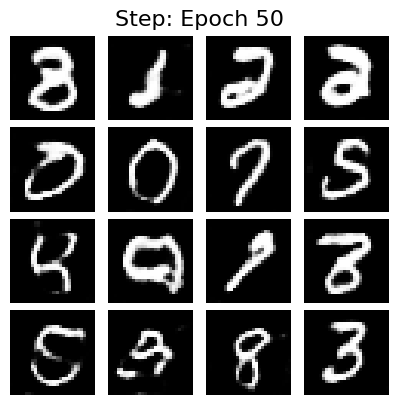


--- Final Generated Images ---


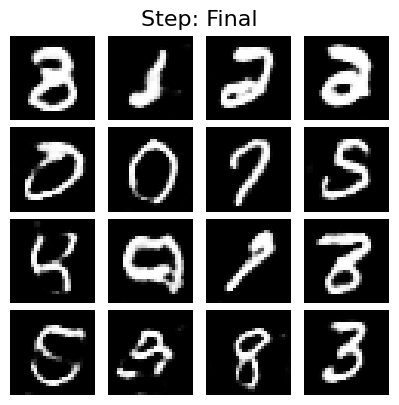

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import time

# --- 1. Generator Model (Stable DCGAN Architecture) ---
# This model takes a random noise vector and upsamples it into a 28x28 image.
def build_generator(input_size=100):
    """Builds a stable Generator model based on the standard DCGAN architecture."""
    model = tf.keras.Sequential(name="Generator")
    model.add(tf.keras.layers.Dense(7 * 7 * 256, use_bias=False, input_shape=(input_size,)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Reshape((7, 7, 256)))
    model.add(tf.keras.layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Conv2DTranspose(1, (5, 5), strides=(1, 1), padding='same', use_bias=False, activation='tanh'))
    return model

# --- 2. Discriminator Model (Stable DCGAN Architecture) ---
# This model takes an image and outputs a single value indicating if it's real or fake.
def build_discriminator(data_shape=(28, 28, 1)):
    """Builds a stable Discriminator model."""
    model = tf.keras.Sequential(name="Discriminator")
    model.add(tf.keras.layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=data_shape))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(1))
    return model

# --- 3. Image Plotting Utility ---
# This helper function plots a grid of generated images.
def plot_images(model, test_input, step=None):
    """Generates and plots a grid of 16 images from the generator model."""
    predictions = model(test_input, training=False)
    plt.figure(figsize=(4, 4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow((predictions[i, :, :, 0] * 127.5 + 127.5), cmap='gray')
        plt.axis('off')
    if step is not None:
        plt.suptitle(f"Step: {step}", fontsize=16)
    plt.tight_layout(pad=0.5)
    plt.show()

# --- 4. Main Training Function (Using a Stable, Explicit Loop) ---
def train_gan(noise_size=100, epochs=50, batch_size=256):
    """The main training loop, using a stable and explicit GradientTape approach."""

    # --- Build Models and Optimizers ---
    generator = build_generator(noise_size)
    discriminator = build_discriminator()

    generator_optimizer = tf.keras.optimizers.Adam(0.0002, 0.5)
    discriminator_optimizer = tf.keras.optimizers.Adam(0.0002, 0.5)

    # --- Loss Functions ---
    cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

    def discriminator_loss(real_output, fake_output):
        real_loss = cross_entropy(tf.ones_like(real_output) * 0.9, real_output) # Label smoothing
        fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
        return real_loss + fake_loss

    def generator_loss(fake_output):
        return cross_entropy(tf.ones_like(fake_output), fake_output)

    # --- Load and Prepare Dataset ---
    (train_images, _), (_, _) = tf.keras.datasets.fashion_mnist.load_data()
    train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
    train_images = (train_images - 127.5) / 127.5

    # --- Training Loop ---
    seed = tf.random.normal([16, noise_size])

    print("--- Starting GAN Training ---")
    for epoch in range(epochs):
        start_time = time.time()

        # Shuffle the data at the start of each epoch
        np.random.shuffle(train_images)
        num_batches = train_images.shape[0] // batch_size

        for i in range(num_batches):
            # Get a batch of real images
            real_images = train_images[i*batch_size:(i+1)*batch_size]
            noise = tf.random.normal([batch_size, noise_size])

            # Use tf.GradientTape to record operations for automatic differentiation
            with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
                generated_images = generator(noise, training=True)

                real_output = discriminator(real_images, training=True)
                fake_output = discriminator(generated_images, training=True)

                gen_loss = generator_loss(fake_output)
                disc_loss = discriminator_loss(real_output, fake_output)

            # Calculate and apply gradients to update the models
            gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
            gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

            generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
            discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

        # At the end of each epoch, log progress and plot images
        print(f'Time for epoch {epoch + 1} is {time.time() - start_time:.2f} sec')
        print(f'Generator Loss: {gen_loss:.4f}, Discriminator Loss: {disc_loss:.4f}')
        plot_images(generator, seed, f"Epoch {epoch + 1}")

    print("\n--- Final Generated Images ---")
    plot_images(generator, seed, "Final")
    generator.save('mnist_generator_dcgan_final.h5')

# --- Main Execution Block ---
if __name__ == '__main__':
    # Simply call the main training function to run everything
    train_gan()
